In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
data=pd.read_csv('user_data.csv')

In [19]:
data.head()

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


In [21]:
data.isnull().sum()

user_id       0
stage         0
conversion    0
dtype: int64

In [22]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     17175 non-null  object
 1   stage       17175 non-null  object
 2   conversion  17175 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 285.3+ KB


,user_id,stage,conversion
count,17175,17175,17175
unique,17175,5,2
top,user_0,homepage,True
freq,1,10000,13014


In [29]:
# Perform EDA
# Count the number of unique stages
stage_counts = data['stage'].value_counts()
print('\nStage Counts:')
print(stage_counts)


Stage Counts:
homepage        10000
product_page     5000
cart             1500
checkout          450
purchase          225
Name: stage, dtype: int64



Conversion Rate: 0.7577292576419214


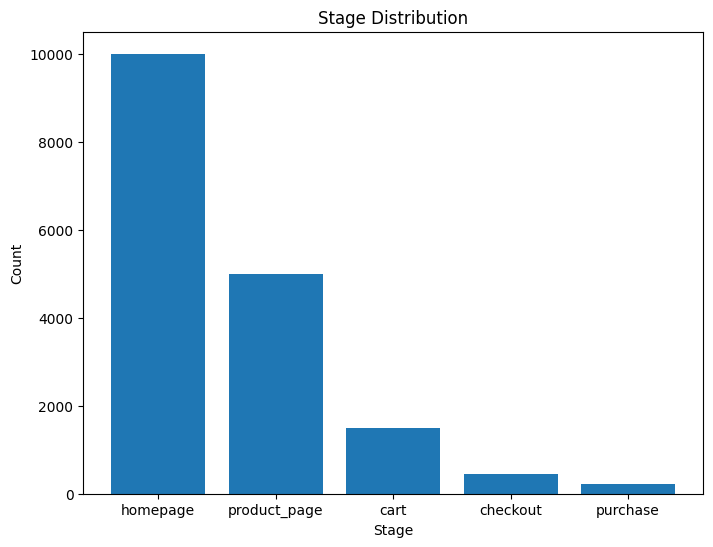

In [30]:
# Calculate the conversion rate
conversion_rate = data['conversion'].mean()
print('\nConversion Rate:', conversion_rate)

# Visualize the stage counts
plt.figure(figsize=(8, 6))
plt.bar(stage_counts.index, stage_counts.values)
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Stage Distribution')
plt.show()

In [31]:
# conversion rate for each stage:
conversion_by_stage = data.groupby('stage')['conversion'].mean()
print('\nConversion Rate by Stage:')
print(conversion_by_stage)



Conversion Rate by Stage:
stage
cart            0.299333
checkout        0.080000
homepage        1.000000
product_page    0.503000
purchase        0.062222
Name: conversion, dtype: float64


In [32]:
# Select only the users who converted:
converted_users = data[data['conversion'] == True]
print('\nConverted Users:')
print(converted_users)




Converted Users:
          user_id     stage  conversion
0          user_0  homepage        True
1          user_1  homepage        True
2          user_2  homepage        True
3          user_3  homepage        True
4          user_4  homepage        True
...           ...       ...         ...
17102  user_17102  purchase        True
17117  user_17117  purchase        True
17130  user_17130  purchase        True
17147  user_17147  purchase        True
17172  user_17172  purchase        True

[13014 rows x 3 columns]


In [33]:
# Pivot tables:
pivot_table = pd.pivot_table(data, values='conversion', index='stage', aggfunc='mean')
print('\nConversion Rate Pivot Table:')
print(pivot_table)





Conversion Rate Pivot Table:
              conversion
stage                   
cart            0.299333
checkout        0.080000
homepage        1.000000
product_page    0.503000
purchase        0.062222


Visualizations:



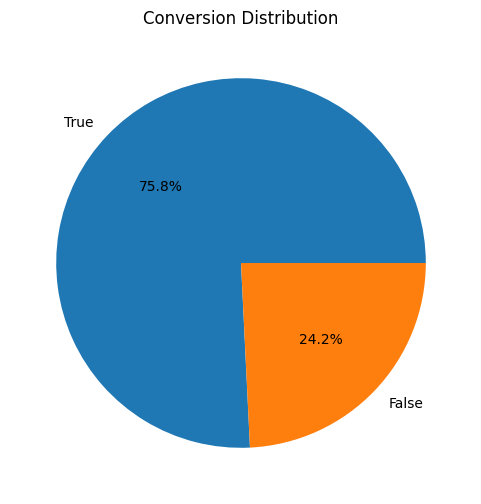

In [34]:
conversion_counts = data['conversion'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conversion_counts, labels=conversion_counts.index, autopct='%1.1f%%')
plt.title('Conversion Distribution')
plt.show()


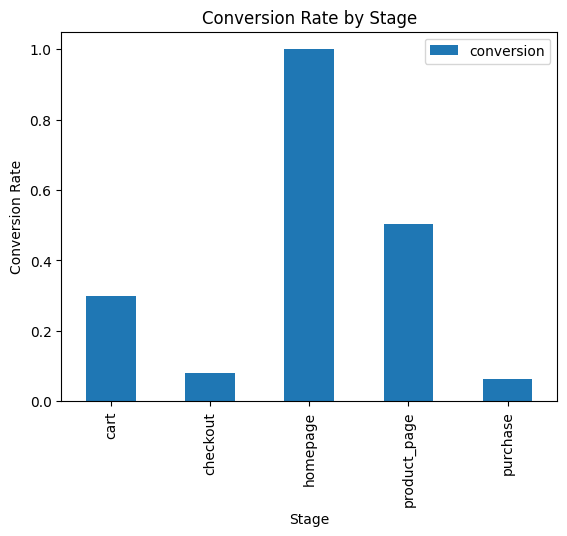

In [35]:
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Stage')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Stage')
plt.show()


In [23]:
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"



Creating The Funnel

In [24]:
#define the funnel stages
funnel_stages = ['homepage', 'product_page', 'cart', 'checkout', 'purchase']


In [25]:
#calculate the number of users and conversions for each stage
num_users = []
num_conversions = []

In [26]:
for stage in funnel_stages:
    stage_users = data[data['stage'] == stage]
    num_users.append(len(stage_users))
    num_conversions.append(stage_users['conversion'].sum())

In [27]:
#create a funnel chart
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='Users'
))

In [28]:
fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='Conversions'
))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'Users',
              'textinfo': 'value',
              'textposition': 'inside',
              'type': 'funnel',
              'x': [10000, 5000, 1500, 450, 225],
              'y': [homepage, product_page, cart, checkout, purchase]},
             {'name': 'Conversions',
              'textinfo': 'value',
              'textposition': 'inside',
              'type': 'funnel',
              'x': [10000, 2515, 449, 36, 14],
              'y': [homepage, product_page, cart, checkout, purchase]}],
    'layout': {'template': '...'}
})